In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
def plot_points(X, y):
    """
    Creates a scatter plot that includes both point groups, blue and red

    Input:
    * X: 
    """
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

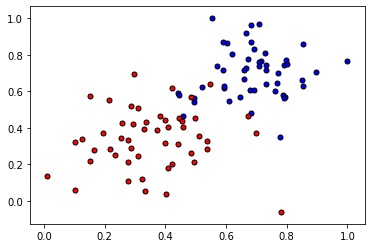

In [36]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [37]:
def stepFunction(t):
    """
    This function determines if Wx+b >= 0?
    Input:
    * t: this is the result of the score function
    Output:
    * returns 1 if t is positive
    * returns 0 if t is negative
    """
    if t >= 0:
        return 1
    return 0

def softmax(L):
    """
    Takes as input a list of numbers, and returns the list of values given by the softmax function

    Input:
    * L: array of inputs
    """
    return np.divide (1, 1 + np.exp(L))

In [38]:
def prediction(X, W, b):
    """
    This will provide the results. It calculates the Matrix
    Multiplication of the weights and the inputs and adds the
    biased.
    Inputs:
    * X: this is the matrix of inputs
    * W: this is the matrix of weights
    * b: this is the scalar for the bias
    Output:
    * returns 1 if calculation is positive
    * returns 0 if calculation is negative
    """
    result = (np.matmul(X,W)+b)[0]
    return stepFunction(result)

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    """
    This calculates the new boundary line based on the weight, input, and learning rate

    Inputs:
    * X: array of inputs
    * y: array of labels
    * W: array of weights
    * b: bias
    * learn_rate: normalizer variable (α)
    Output:
    * returns the modified array of weights and the bias scalar
    """
    # for each element in the input array
    for i in range(len(X)):
        # Calculates the step function of the results of the input
        y_hat = prediction(X[i],W,b)
        # If prediction = 0
        if y[i]-y_hat == 1:
            # Change weight to weight + α * input
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            # Change b to b + α
            b += learn_rate
        # If prediction = 1
        elif y[i]-y_hat == -1:
            # Change weight to weight - α * input
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            # Change b to b - α
            b -= learn_rate
    # Return new boundary
    return W, b

## Training function


In [39]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, epochs = 25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.

    Input:
    * X: array of (x,y) coordinates
    * y: array of labels
    Output:
    * returns an array of scalars that represent boundary lines
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    weights = np.array(np.random.rand(2,1))
    bias = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for e in range(epochs):
        # In each epoch, we apply the perceptron step.
        weights, bias = perceptronStep(X, y, weights, bias, learn_rate)
        boundary_lines.append((-weights[0]/weights[1], -bias/weights[1]))
        display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()
    return boundary_lines

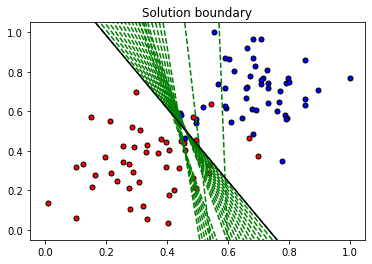

In [40]:
def main():
    data = pd.read_csv('data.csv', header=None)
    X = np.array(data[[0,1]])
    y = np.array(data[2])
    np.random.seed(42)
    # Train Perceptron
    trainPerceptronAlgorithm(X, y)
    

main()